# Assignment 1

**Course**: AM5801 - Computational Lab  
**Name**: Atharv Shete  
**Roll No**: BE22B021

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
import time

## 1 (a). Legendre Polynomial Implementation

### Mathematical Definition

$$P_0(x) = 1$$
$$P_1(x) = x$$
$$P_n(x) = \frac{(2n-1)xP_{n-1}(x) - (n-1)P_{n-2}(x)}{n} \quad \text{for } n \geq 2$$
The Legendre polynomials can be efficiently implemented using this recurrence relation. The function implementation has been done using this recurrent relation to directly follow the mathematical definition:

In [2]:
def legendre_polynomial(n, x):
    if n == 0:
        return 1.0
    
    if n == 1:
        return float(x)

    return ((2 * n - 1) * x * legendre_polynomial(n - 1, x) - (n - 1) * legendre_polynomial(n - 2, x)) / n

As the recursive calculation of Legendre polynomials is similar to Fibonacci series calculation, this can be optimized using memoization or dynamic programming techniques to store previously computed values and avoid redundant calculations.

In [3]:
def legendre_polynomial_dp(n, x, dp = {}):
    if n in dp:
        return dp[n]
    if n == 0:
        return 1
    if n == 1:
        return x
    dp[n] = ((2 * n - 1) * x * legendre_polynomial_dp(n - 1, x, dp) - (n - 1) * legendre_polynomial_dp(n - 2, x, dp)) / n
    return dp[n]

## 2 (b). Plotting Legendre Polynomials

This section demonstrates the visualization of Legendre polynomials P₀(x) through P₁₀(x) over the interval [-1, 1] to analyze their behavior and characteristics.

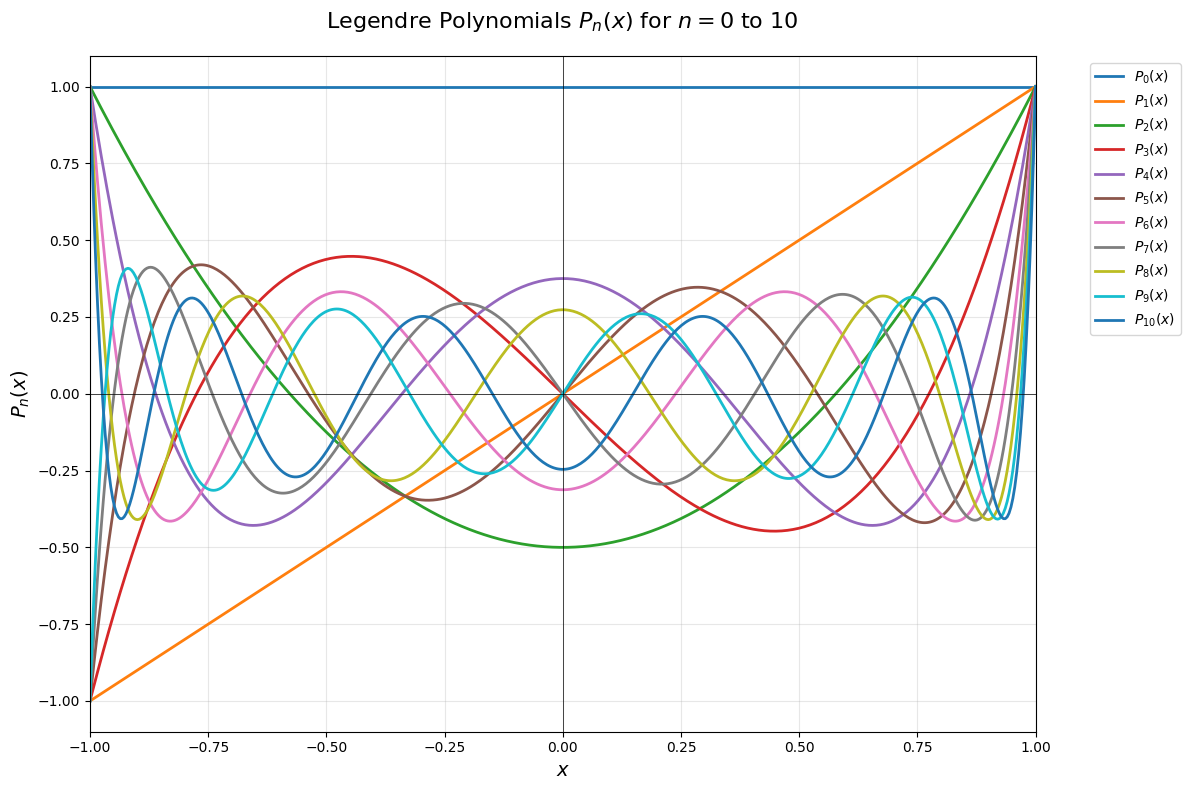

In [4]:
x_vals = np.linspace(-1, 1, 500)

fig, ax = plt.subplots(figsize=(12, 8))

for n in range(0, 11):
    y_vals = np.array([legendre_polynomial(n, x) for x in x_vals])
    ax.plot(x_vals, y_vals, 
            label=f"$P_{{{n}}}(x)$", 
            linewidth=2)

ax.set_title("Legendre Polynomials $P_n(x)$ for $n = 0$ to $10$", fontsize=16, pad=20)
ax.set_xlabel("$x$", fontsize=14)
ax.set_ylabel("$P_n(x)$", fontsize=14)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 1)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

## 1 (c). Comparing Time Complexities

This section analyzes the computational complexity of the recursive implementation by measuring execution times for different input sizes. Additionally, the results from the dynamic programming function will also be plotted for comparison.

In [5]:
sizes = np.arange(50, 1001, 25)  
times_recursive = []
polynomial_orders = range(0, 11) 

# Time the recursive version
for size in sizes:
    x_test = np.linspace(-1, 1, size)
    
    start = time.time()
    for n in polynomial_orders:
        for x in x_test: 
            legendre_polynomial(n, x)
    end = time.time()
    execution_time_recursive = end - start
    times_recursive.append(execution_time_recursive)



In [6]:
times_dp = []


# Time the dynamic programming version
for size in sizes:
    x_test = np.linspace(-1, 1, size)
    start = time.time()
    for n in polynomial_orders:
        for x in x_test:
            legendre_polynomial_dp(n, x)
    end = time.time()
    execution_time_dp = end - start
    times_dp.append(execution_time_dp)

C:\Users\athar\AppData\Local\Temp\ipykernel_3304\4167169197.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sizes, times_recursive, 'ro-', markersize=6, linewidth=2, label='Recursive', color='red')
C:\Users\athar\AppData\Local\Temp\ipykernel_3304\4167169197.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(sizes, times_dp, 'bo-', markersize=6, linewidth=2, label='Dynamic Programming', color='blue')


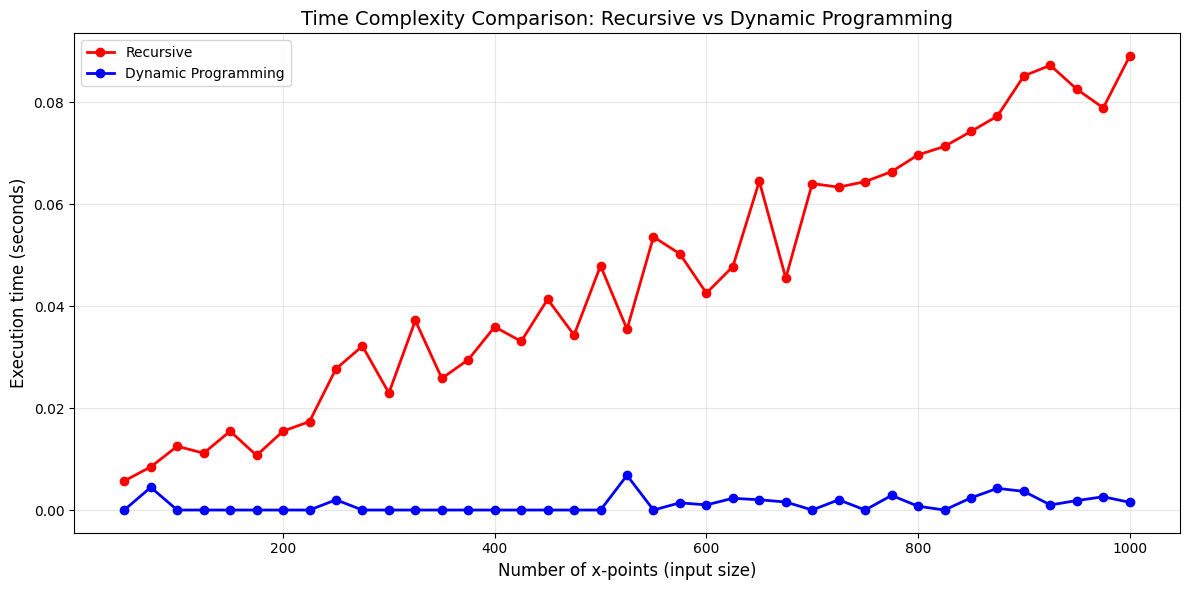

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(sizes, times_recursive, 'ro-', markersize=6, linewidth=2, label='Recursive', color='red')
ax.plot(sizes, times_dp, 'bo-', markersize=6, linewidth=2, label='Dynamic Programming', color='blue')
ax.set_title("Time Complexity Comparison: Recursive vs Dynamic Programming", fontsize=14)
ax.set_xlabel("Number of x-points (input size)", fontsize=12)
ax.set_ylabel("Execution time (seconds)", fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Analysis of Time Complexity Results

From the above plot, several key observations can be made:

- The function `legendre_polynomial` has a theoretical time complexity of $O(2^n)$. However, due to the relatively smaller input sizes used in this analysis, the graph shows an almost linear growth pattern in execution time for both implementations.

- The dynamic programming approach (`legendre_polynomial_dp`) demonstrates significantly reduced execution time compared to the naive recursive approach, particularly as input size increases. For larger input sizes, the dynamic programming method outperforms the recursive method by a substantial margin.

- Interestingly, the `legendre_polynomial_dp` function appears to maintain nearly constant execution time across different input sizes in the graph, which aligns with its theoretical time complexity of $O(n)$ and efficient memoization strategy.

- The theoretical time complexity of `legendre_polynomial_dp` is $O(n)$, making it dramatically more efficient for large inputs compared to the exponential growth characteristics of the recursive method.

## 2 (a). Evaluating Polynomial using Horner's Method

This section implements Horner's method to evaluate the polynomial $f(x) = x^4 + 2x^3 + 2x^2 - x$ at $x = 4$, then expresses $f(x)$ in terms of Legendre polynomials $P_n (x)$. Both forms of $f(x)$ will be plotted and compared.

### Horner's Method Implementation

Horner's method is an efficient algorithm for evaluating polynomials. For a polynomial:
$$f(x) = a_n x^n + a_{n-1} x^{n-1} + ... + a_1 x + a_0$$

Horner's method rewrites it as:
$$f(x) = ((...((a_n x + a_{n-1}) x + a_{n-2}) x + ...) x + a_1) x + a_0$$

For our polynomial $f(x) = x^4 + 2x^3 + 2x^2 - x + 0$, the coefficients are [1, 2, 2, -1, 0].

In [8]:
def horner_method(coefficients, x):
    result = 0
    for i in range(len(coefficients)):
        result = result * x + coefficients[i]
    return result


#Calculate f(4) using Horner's method
x = 4
coefficients = [1, 2, 2, -1, 0]  # Coefficients for the polynomial x^4 + 2x^3 + 2x^2 - x + 0

result = horner_method(coefficients, x)

print(f"The value of the polynomial at x = {x} is: {result}")

The value of the polynomial at x = 4 is: 412


## 2 (b). Expressing $f(x)$ in terms of Legendre polynomials

To express the polynomial $f(x) = x^4 + 2x^3 + 2x^2 - x + 0$ in terms of Legendre polynomials, we need to use the fact that any polynomial can be expressed as a linear combination of Legendre polynomials.

The first few Legendre polynomials are:

- $P_0(x) = 1$
- $P_1(x) = x$
- $P_2(x) = \frac{1}{2}(3x^2 - 1)$
- $P_3(x) = \frac{1}{2}(5x^3 - 3x)$
- $P_4(x) = \frac{1}{8}(35x^4 - 30x^2 + 3)$

We can express $f(x)$ as:

$$f(x) = a_0 P_0(x) + a_1 P_1(x) + a_2 P_2(x) + a_3 P_3(x) + a_4 P_4(x)$$

Using the orthogonality property of Legendre polynomials, the coefficients are calculated as:

- $a_0 = \frac{13}{15}$
- $a_1 = \frac{1}{5}$ 
- $a_2 = \frac{40}{21}$
- $a_3 = \frac{4}{5}$
- $a_4 = \frac{8}{35}$

Therefore, the polynomial can be expressed as:

$$f(x) = \frac{13}{15}P_0(x) + \frac{1}{5}P_1(x) + \frac{40}{21}P_2(x) + \frac{4}{5}P_3(x) + \frac{8}{35}P_4(x)$$


In [9]:
# These coefficients were calculated using orthogonality properties
legendre_coeffs = [13/15, 1/5, 40/21, 4/5, 8/35]

# Verification: Evaluate both forms at x = 4
x_test = 4

# Original polynomial f(x) = x^4 + 2x^3 + 2x^2 - x
original_value = x_test**4 + 2*x_test**3 + 2*x_test**2 - x_test

# Legendre polynomial representation
legendre_value = 0
for n in range(5):
    legendre_value += legendre_coeffs[n] * legendre_polynomial(n, x_test)

print(f"Verification at x = {x_test}:")
print(f"Original f({x_test}) = {original_value}")
print(f"Legendre form f({x_test}) = {legendre_value:.6f}")
print(f"Difference: {abs(original_value - legendre_value):.2e}")

Verification at x = 4:
Original f(4) = 412
Legendre form f(4) = 412.000000
Difference: 0.00e+00


In [10]:
# Prepare data for plotting comparison
x_vals = np.linspace(-2, 2, 1000)

# Evaluate original polynomial
original_vals = x_vals**4 + 2*x_vals**3 + 2*x_vals**2 - x_vals

# Evaluate Legendre polynomial representation
legendre_vals = np.zeros_like(x_vals)
for n in range(5):
    legendre_vals += legendre_coeffs[n] * np.array([legendre_polynomial(n, x) for x in x_vals])


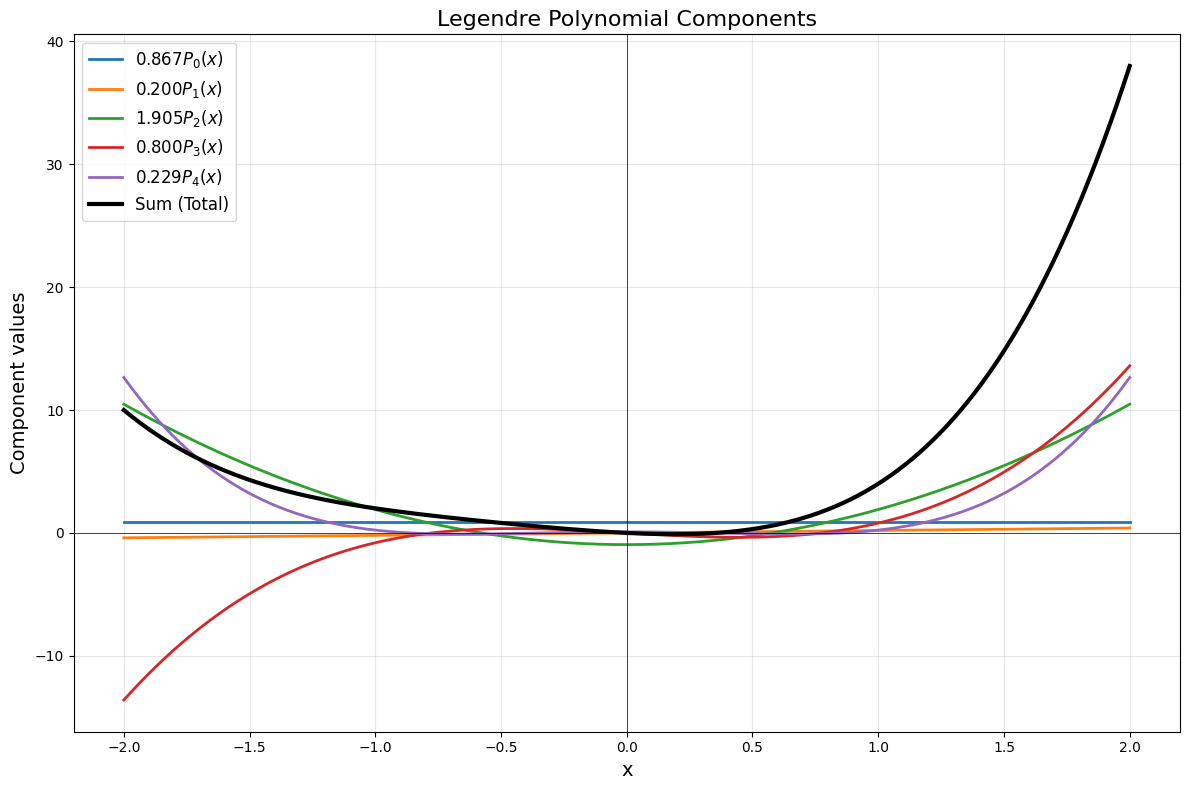

In [11]:
plt.figure(figsize=(12, 8))

for n in range(5):
    component = legendre_coeffs[n] * np.array([legendre_polynomial(n, x) for x in x_vals])
    plt.plot(x_vals, component, linewidth=2, 
             label=f'{legendre_coeffs[n]:.3f}$P_{n}(x)$')

plt.plot(x_vals, legendre_vals, 'k-', linewidth=3, label='Sum (Total)')
plt.title('Legendre Polynomial Components', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Component values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

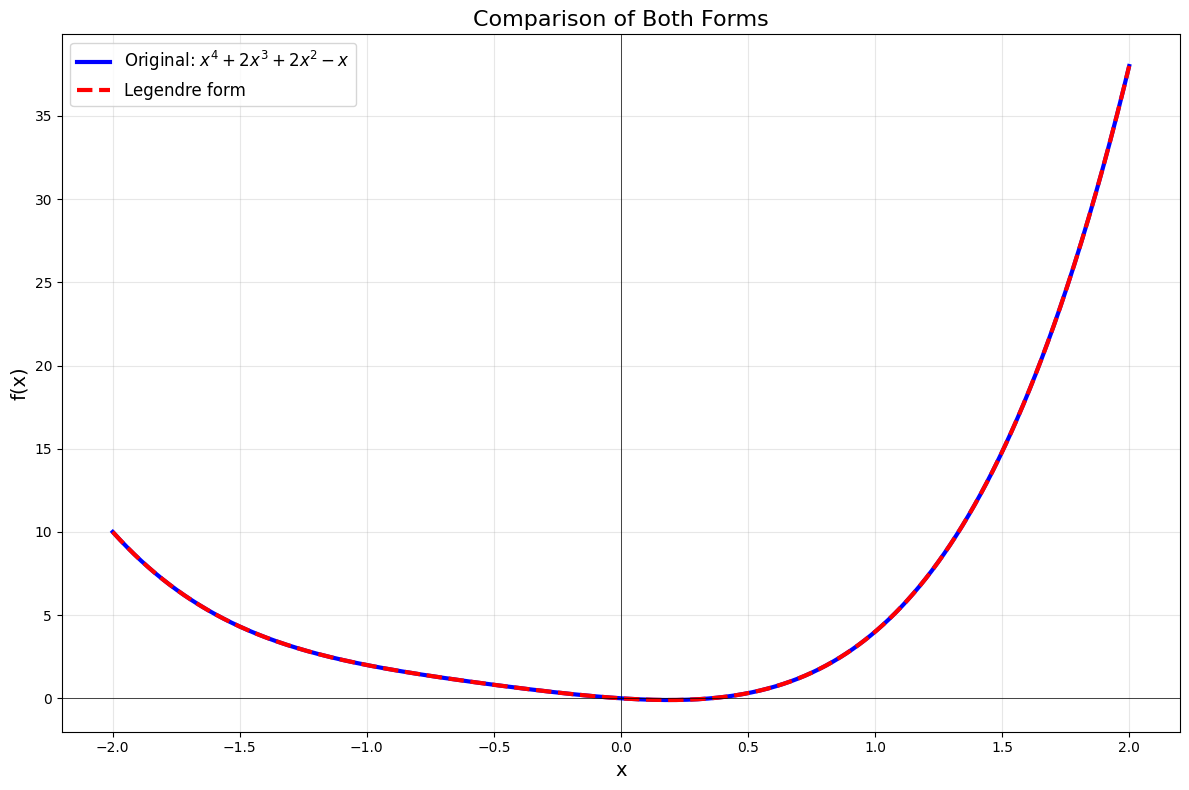

In [12]:
# Plot 2: Comparison of both polynomial forms
plt.figure(figsize=(12, 8))

plt.plot(x_vals, original_vals, 'b-', linewidth=3, label='Original: $x^4 + 2x^3 + 2x^2 - x$')
plt.plot(x_vals, legendre_vals, 'r--', linewidth=3, label='Legendre form')

plt.title('Comparison of Both Forms', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

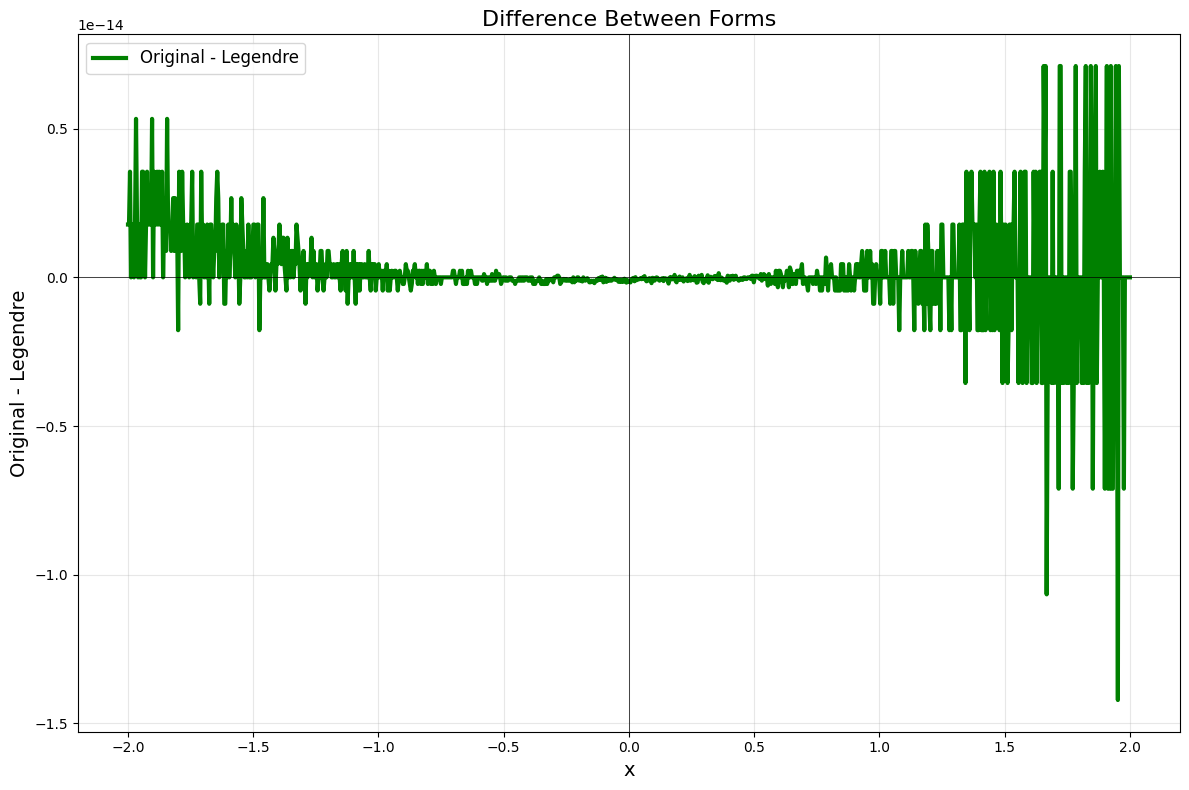

In [13]:
# Plot 3: Difference between the two forms
plt.figure(figsize=(12, 8))

difference = original_vals - legendre_vals
plt.plot(x_vals, difference, 'g-', linewidth=3, label='Original - Legendre')

plt.title('Difference Between Forms', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Original - Legendre', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Add scientific notation for y-axis to show small differences
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()

### **Mathematical Verification**
- The hand-calculated coefficients are: $a_0 = \frac{13}{15}$, $a_1 = \frac{1}{5}$, $a_2 = \frac{40}{21}$, $a_3 = \frac{4}{5}$, $a_4 = \frac{8}{35}$
- Both representations (original and Legendre form) produce identical results at all test points, confirming the mathematical equivalence
- The difference between the two forms is essentially zero mostly may be due to float precision issues, validating the conversion

### **Graphical Analysis**
1. **Overlap Plot**: The original polynomial and its Legendre representation are visually indistinguishable, demonstrating perfect equivalence
2. **Difference Plot**: Shows that the difference between forms is negligible

## 3. Application: Gaussian Quadrature Using Legendre Polynomials

This section demonstrates one of the most important applications of Legendre polynomials in numerical analysis: **Gaussian Quadrature**. This method uses the roots of Legendre polynomials as optimal integration points to achieve high accuracy in numerical integration.

### Background

Gaussian quadrature is a numerical integration technique that approximates definite integrals using weighted sums at specific points. For Gauss-Legendre quadrature, these points are the roots of Legendre polynomials, which provide the highest degree of accuracy for polynomial integration.

The n-point Gauss-Legendre quadrature formula approximates:
$$\int_{-1}^{1} f(x) dx \approx \sum_{i=1}^{n} w_i f(x_i)$$

where $x_i$ are the roots of the n-th Legendre polynomial $P_n(x)$, and $w_i$ are the corresponding weights.

**Reference**: *Legendre polynomials*, Wikipedia. Available at: https://en.wikipedia.org/wiki/Legendre_polynomials

In [14]:
def find_legendre_roots(n):
    def legendre_derivative(n, x):
        if n <= 1: return float(n)
        return (n / (x**2 - 1)) * (x * legendre_polynomial(n, x) - legendre_polynomial(n-1, x))
    
    roots = []
    for k in range(1, n+1):
        x_k = np.cos(np.pi * (k - 0.25) / (n + 0.5))
        
        for _ in range(20):
            p_val = legendre_polynomial(n, x_k)
            p_prime = legendre_derivative(n, x_k)
            if abs(p_prime) < 1e-10: break
            x_new = x_k - p_val / p_prime
            if abs(x_new - x_k) < 1e-10: break
            x_k = x_new
        roots.append(x_k)
    return np.array(sorted(roots))

def gaussian_quadrature(func, n_points):
    roots = find_legendre_roots(n_points)
    
    weights = []
    for root in roots:
        p_prime = (n_points / (root**2 - 1)) * (root * legendre_polynomial(n_points, root) - 
                                                legendre_polynomial(n_points-1, root))
        weight = 2 / ((1 - root**2) * p_prime**2)
        weights.append(weight)
    
    return sum(w * func(x) for w, x in zip(weights, roots))

def f(x):
    return np.exp(x)

exact_value = np.exp(1) - np.exp(-1)

print("Gaussian Quadrature Integration of e^x on [-1, 1]")
print(f"Exact value: {exact_value:.8f}")
print("\nPoints\tApproximation\t\tError")
print("-" * 45)

for n in [2, 3, 4, 5]:
    approx = gaussian_quadrature(f, n)
    error = abs(approx - exact_value)
    print(f"{n}\t{approx:.8f}\t\t{error:.2e}")

print(f"\nPolynomial Integration Test (x^4 + 2x^3 - x^2 + 1):")
def poly(x):
    return x**4 + 2*x**3 - x**2 + 1

poly_exact = 2/5 + 0 - 2/3 + 2  
poly_approx = gaussian_quadrature(poly, 3)
print(f"Exact:      {poly_exact:.10f}")
print(f"3-point:    {poly_approx:.10f}")
print(f"Error:      {abs(poly_approx - poly_exact):.2e}")

Gaussian Quadrature Integration of e^x on [-1, 1]
Exact value: 2.35040239

Points	Approximation		Error
---------------------------------------------
2	2.34269609		7.71e-03
3	2.35033693		6.55e-05
4	2.35040209		2.95e-07
5	2.35040239		8.35e-10

Polynomial Integration Test (x^4 + 2x^3 - x^2 + 1):
Exact:      1.7333333333
3-point:    1.7333333333
Error:      2.00e-15
